# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

In [3]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

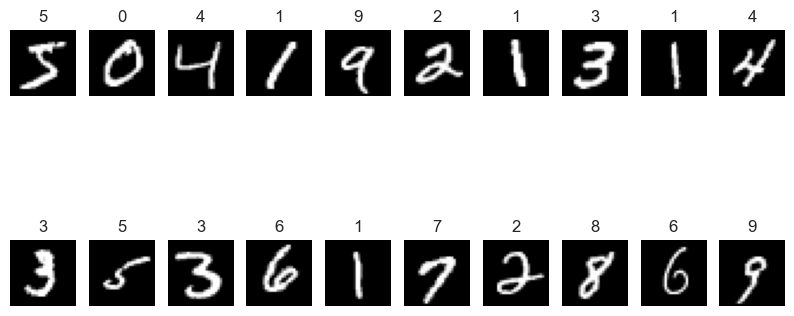

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(y[i])
plt.show()


### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [5]:
#Preprocessing data and splitting data sets into training and testing datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Setting up Logistic Regression with L1 regularization
log_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=100, random_state=42)
# Define a grid of hyperparameters to search
param_grid = {'C':[0.01,0.1,1,10]}

#Using GridsearchCV to find the best C
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Best model
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best C value: {grid_search.best_params_['C']}")
print(f"Test accuracy:{accuracy:.4f}")

C:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best C value: 10
Test accuracy:0.9184


### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

Number of components to explain 80% variance:146


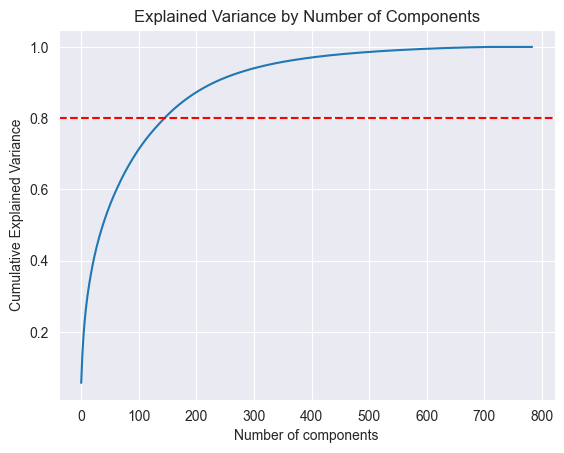

In [12]:
from sklearn.decomposition import PCA
import numpy as np
# PCA to find the variance
pca = PCA()
pca.fit(X_train)

# Cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(explained_variance_ratio >= 0.8) + 1

print(f"Number of components to explain 80% variance:{n_components_80}")

#Plotting the variance
plt.plot(explained_variance_ratio)
plt.axhline(0.8, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.